In [1]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from Dataloaders import EyePacsLoader
from Dataloaders import KaggleLoader
from ImageProcessing import Preprocess
from ImageProcessing import DataAug
from DataSetParam import DataSetParam


In [2]:
data = KaggleLoader.KaggleDataLoader(DataSetParam.KaggleTrain.annotfile,DataSetParam.KaggleTrain.imagefolder,Preprocess.PreprocessNClahe())
dataloader = DataLoader(data, batch_size=1, shuffle=True)

In [3]:
features, labels = next(iter(dataloader)) #Data

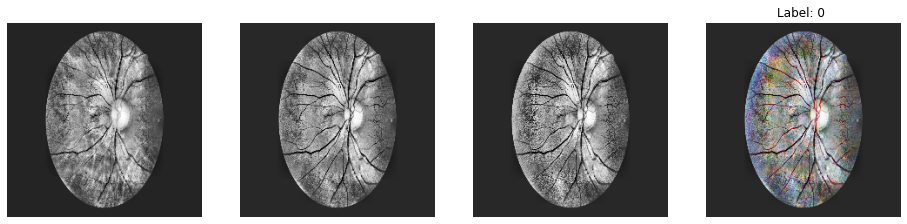

In [4]:
trans = Preprocess.Preprocess()

train_features, train_labels = next(iter(dataloader))
train_features = trans(train_features)

figure = plt.figure(figsize=(16, 16))
cols, rows = 4, 1
for i in range(0, cols * rows):
        img = train_features[0].squeeze()
        figure.add_subplot(rows, cols, i+1)
        plt.axis("off")
        if i == 3:
            plt.imshow(img.permute(1, 2, 0)) 
        else :
            plt.imshow(img[i], cmap="gray") 
        
plt.title(f"Label: {int(train_labels[0])} ")
plt.show()

In [5]:
def showimg(features, labels,transform=None):
    figure = plt.figure(figsize=(16, 16))
    cols, rows = 1, 1
    print(f"Feature batch shape: {features.size()}")
    print(f"Labels batch shape: {labels.size()}")
    for i in range(0, cols * rows):
        label = labels[i]
        img = features[i]
        if transform:
            for modifier in transform:
                img = modifier(img)
        img = img.squeeze()
        figure.add_subplot(rows, cols, i+1)
        plt.title(f"Label: {int(label)} ")
        plt.axis("off")
        plt.imshow(img.permute(1, 2, 0))
    plt.show()

Feature batch shape: torch.Size([1, 3, 224, 224])
Labels batch shape: torch.Size([1])


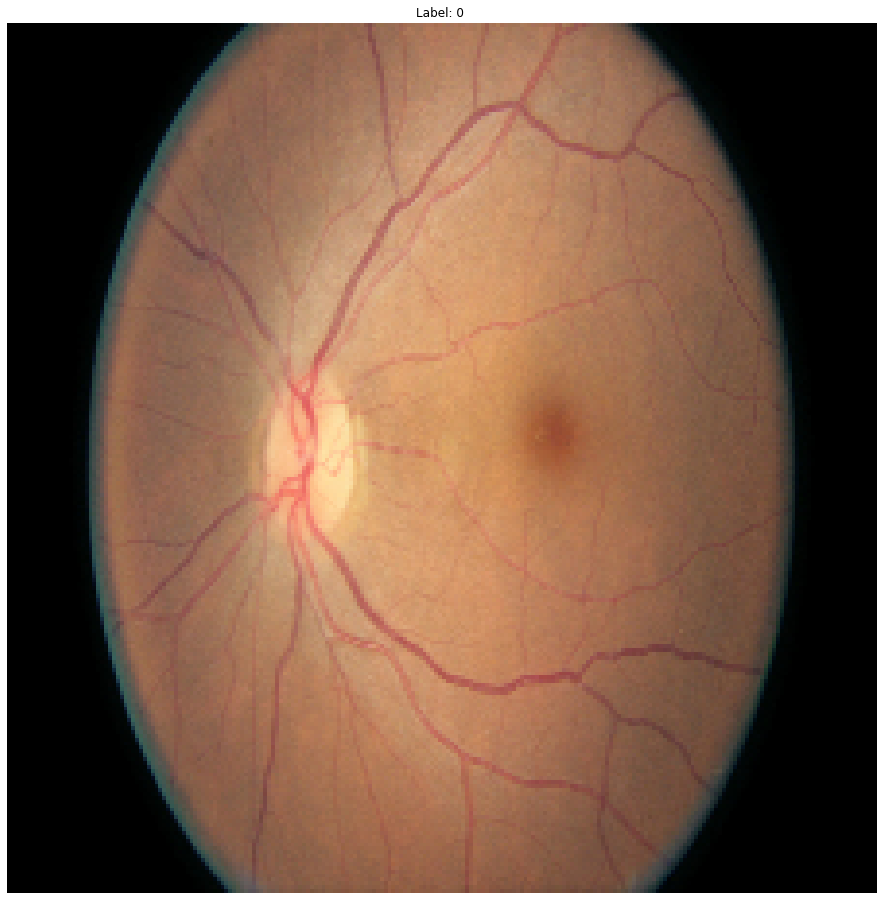

In [6]:
showimg(features, labels)

Feature batch shape: torch.Size([1, 3, 224, 224])
Labels batch shape: torch.Size([1])


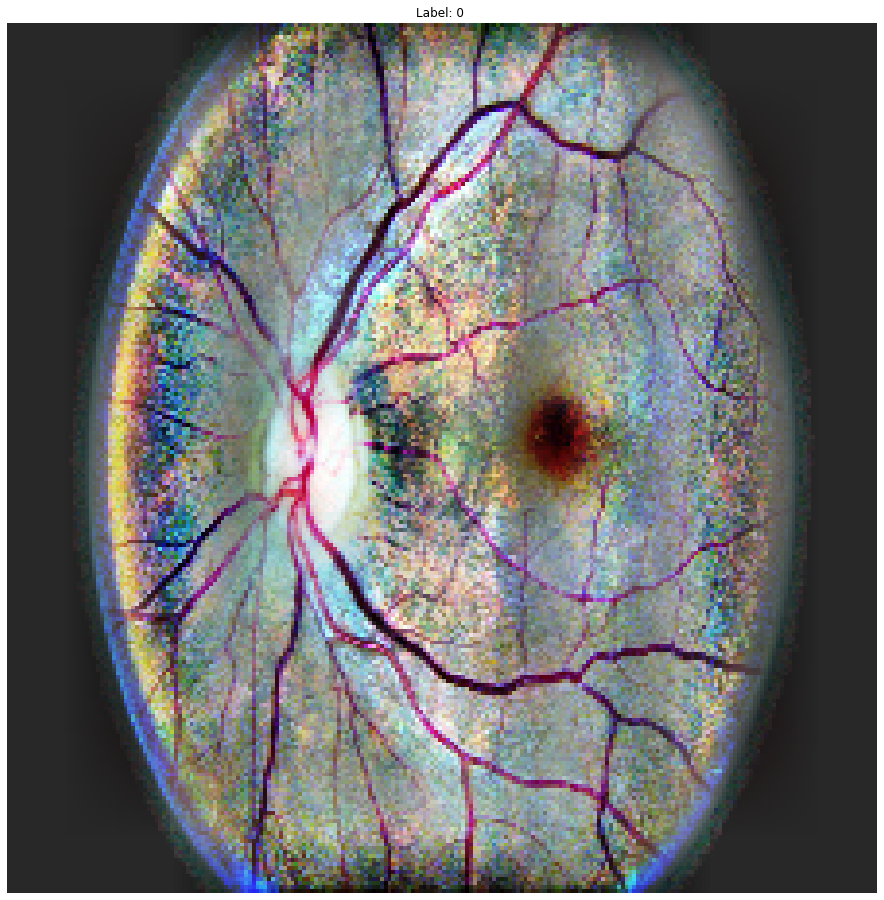

In [7]:
showimg(features, labels,(Preprocess.Preprocess(),))

Feature batch shape: torch.Size([1, 3, 224, 224])
Labels batch shape: torch.Size([1])


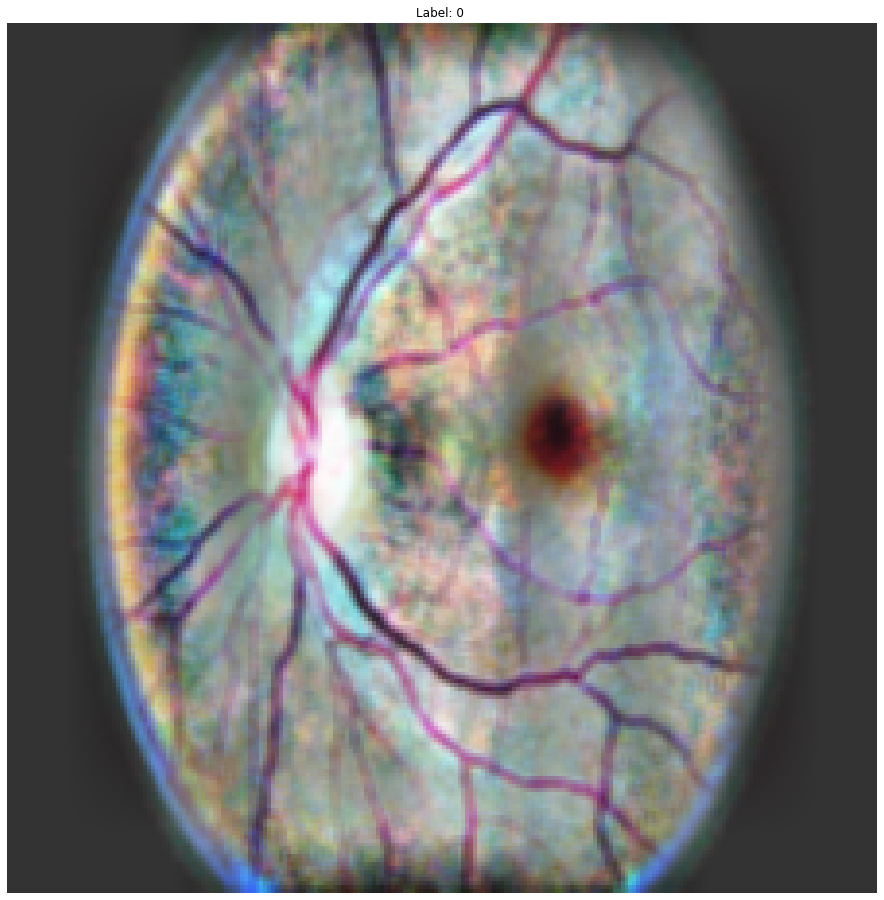

In [8]:
showimg(features, labels,(Preprocess.Preprocess(),DataAug.DataAugmentation()))

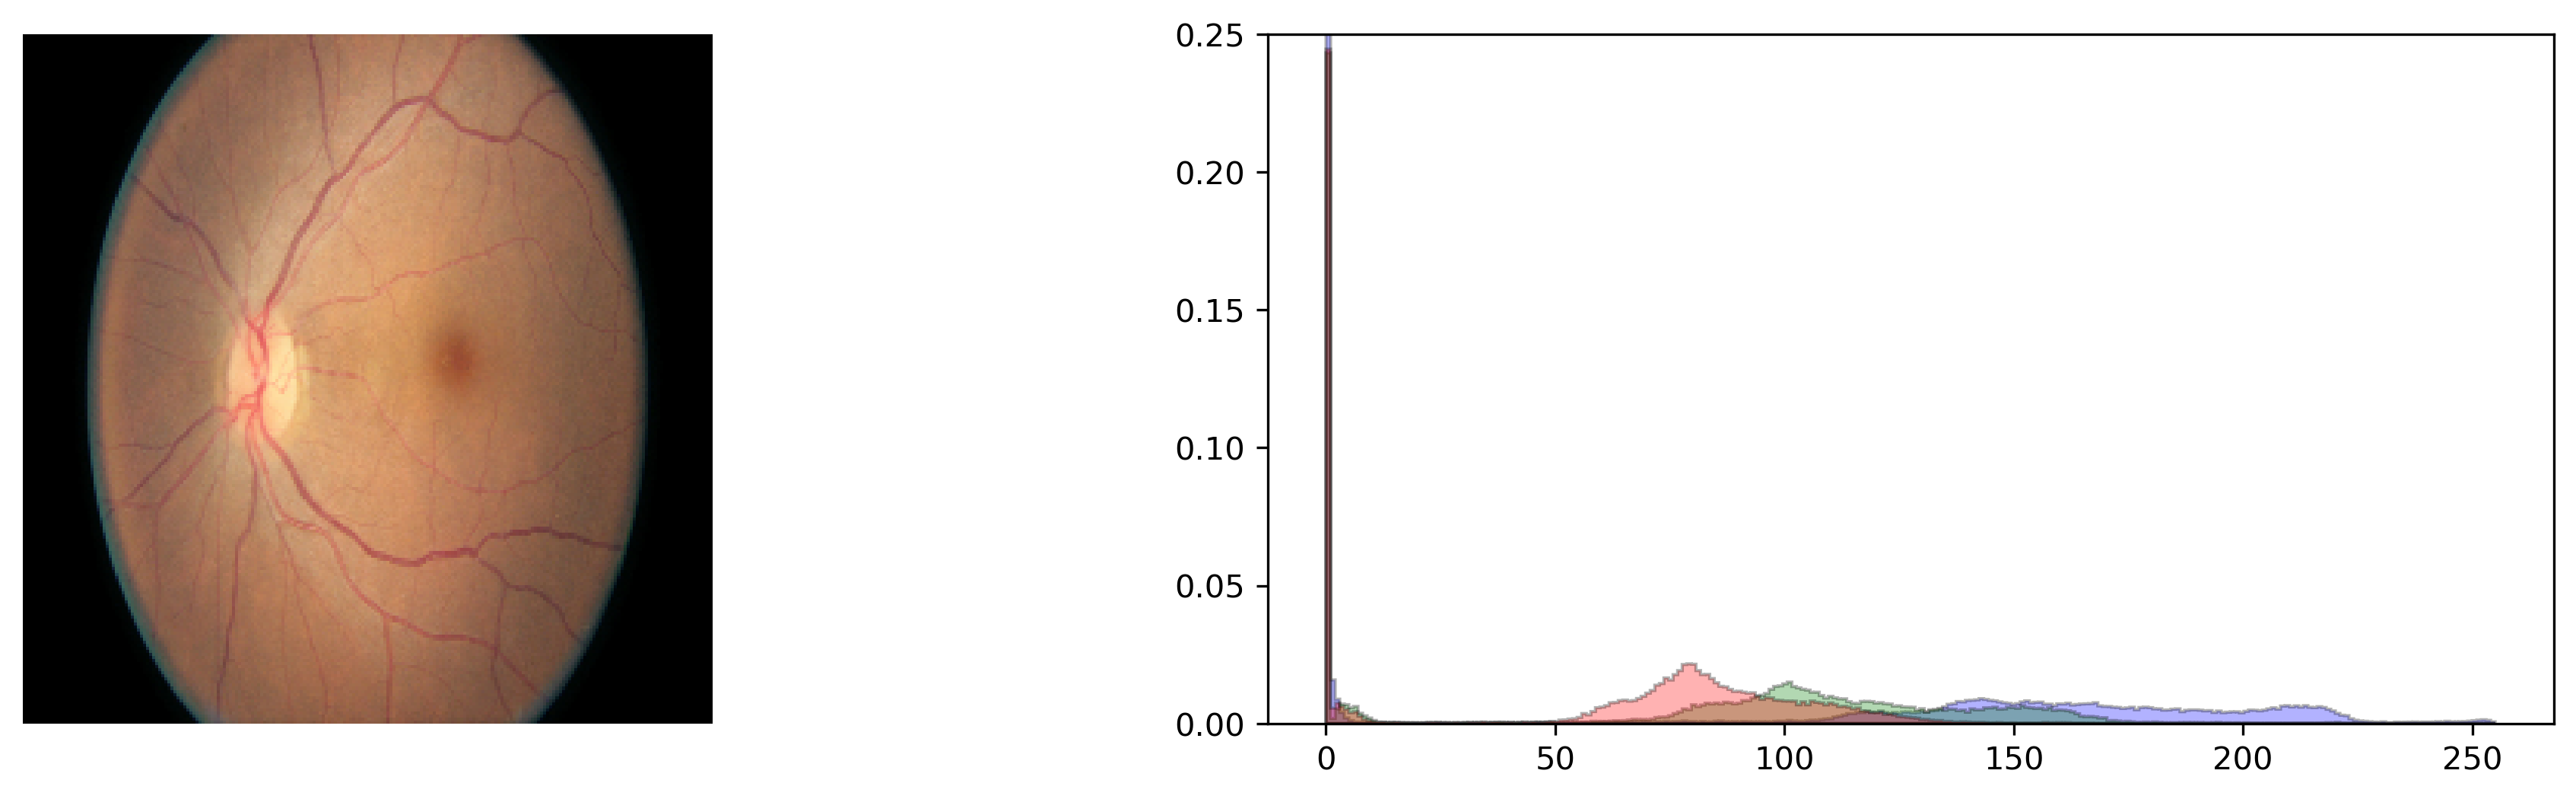

In [35]:
from typing import List, Tuple
from matplotlib import pyplot as plt
import numpy as np
import cv2
import torch
import kornia as K
import torchvision
def histogram_img(img_t: torch.Tensor, size: Tuple[int, int] = (16, 4)):
    preprocess = Preprocess.Preprocess()
    #img_t =preprocess(img_t)
    CH, H, W = img_t.shape
    img_t = img_t#.mul(255.).byte()
    img = K.utils.tensor_to_image(img_t)
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=size,dpi=300)
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    colors = ('b','g','r')
    kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, ec="k")

    for i in range(CH):
        img_vec = img[..., i].flatten()
        ax2.hist(img_vec, range=(0, 255), bins=256, color=colors[i], **kwargs)

    ax1.imshow(img, cmap=(None if CH > 1 else 'gray'))
    ax1.grid(False)
    ax1.axis('off')
    #ax = plt.gca()
    ax2.set_ylim([0.00, 0.25])

    plt.show()
plot_indices: int =  0  # try: [0, 1, 2, 3]
histogram_img(features[plot_indices])